In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'http://bit.ly/drinksbycountry'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [5]:
# pd.read_csv('C:/Users/akshathi/Downloads')
# pd.read_csv(r'C:\Users\akshathi\Downloads')

# for using colab
#from google.colab import files
#files.upload()

In [6]:
data = pd.read_csv('beer-servings.csv')

In [7]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [8]:
# the column unnamed 0 is same as index, so here we can remove this column
# either drop the coulmn as such
# or make that column as the index

In [9]:
# data.drop('Unnamed: 0', axis =1, inplace=True)

In [10]:
data = pd.read_csv('beer-servings.csv', index_col='Unnamed: 0')

In [11]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [12]:
data.shape

(193, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [14]:
data.isna().sum() # get count of null values

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [15]:
# data.isnull().sum

In [16]:
# easiest method to handle to missing values is to drop the rows having missing values- not recommended

In [17]:
# so fill missing values

### Filling Missing Values

#### METHOD 1

In [18]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [19]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [20]:
num_cols = data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [21]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [22]:
# imputation - filling missing values

#### simple imputer

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [25]:
type(num_cols)

numpy.ndarray

In [26]:
num_cols = pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [27]:
num_cols.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [28]:
type(num_cols)

pandas.core.frame.DataFrame

In [29]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [30]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis=1, inplace=True)

In [31]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [32]:
data = pd.concat([num_cols, data], axis=1)

In [33]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [34]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

#### METHOD 2

In [35]:
data = pd.read_csv('beer-servings.csv', index_col='Unnamed: 0')

In [36]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

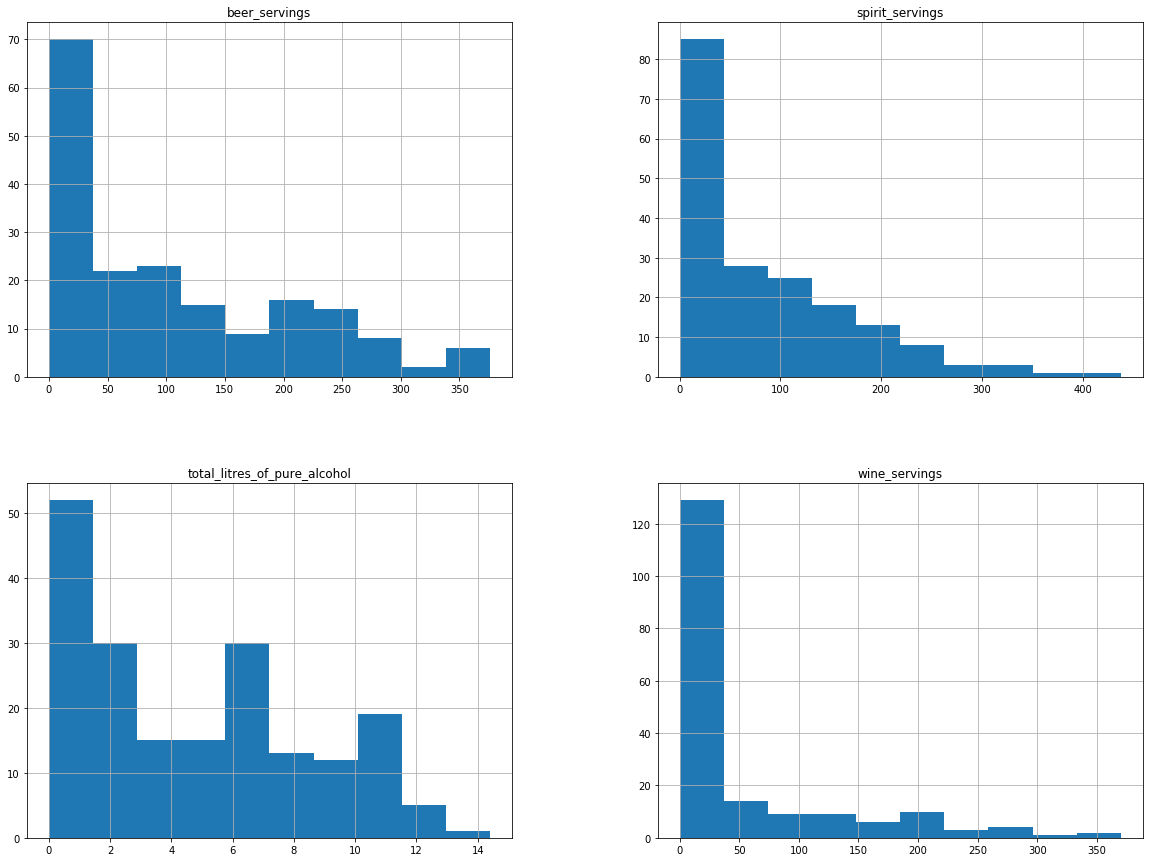

In [37]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [38]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [39]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [40]:
data['beer_servings'].isna().sum()

0

In [41]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())
    

In [42]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [43]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

### Managing Outliers

#### IQR method
#### Finding outliers

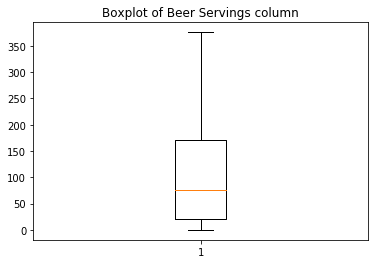

In [44]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of Beer Servings column')
plt.show()

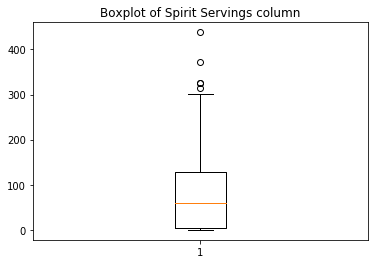

In [45]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of Spirit Servings column')
plt.show()

In [46]:
Q1 = np.percentile(data['spirit_servings'], 25, interpolation='midpoint')
Q2 = np.percentile(data['spirit_servings'], 50, interpolation='midpoint')
Q3 = np.percentile(data['spirit_servings'], 75, interpolation='midpoint')

In [47]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [48]:
data['spirit_servings'].median()

60.0

In [49]:
IQR = Q3-Q1

In [50]:
print(IQR)

123.0


In [51]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [52]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [53]:
outlier = []
for x in data['spirit_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [54]:
print(outlier)

[373.0, 438.0, 326.0, 326.0, 315.0]


#### Drop outliers if necessary

In [55]:
ind = data['spirit_servings'] > up_lim

In [56]:
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [57]:
data.drop([15, 68, 73, 141, 144], inplace = True)

In [58]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
3,Andorra,245.0,138.0,312.0,12.40,Europe
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6,Argentina,76.0,25.0,221.0,8.30,South America
7,Armenia,21.0,179.0,11.0,3.80,Europe
8,Australia,261.0,72.0,212.0,10.40,Oceania
9,Austria,279.0,75.0,191.0,9.70,Europe


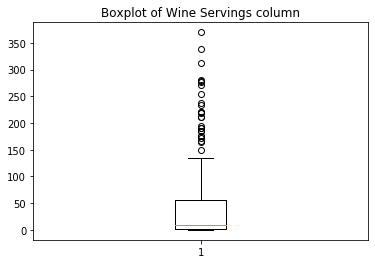

In [59]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of Wine Servings column')
plt.show()

In [60]:
Q1 = np.percentile(data['wine_servings'], 25, interpolation='midpoint')
Q2 = np.percentile(data['wine_servings'], 50, interpolation='midpoint')
Q3 = np.percentile(data['wine_servings'], 75, interpolation='midpoint')

In [61]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [62]:
IQR = Q3-Q1
print(IQR)

56.5


In [63]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-83.75
142.25


In [64]:
outlier = []
for x in data['wine_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
print(outlier)
print("Number of outliers:",len(outlier))

[312.0, 221.0, 212.0, 191.0, 212.0, 172.0, 254.0, 278.0, 233.0, 370.0, 149.0, 175.0, 218.0, 185.0, 165.0, 237.0, 271.0, 190.0, 175.0, 339.0, 167.0, 276.0, 186.0, 280.0, 195.0, 220.0]
Number of outliers: 26


In [65]:
data['wine_servings'].median()

9.0

In [66]:
ind = data['wine_servings'] > up_lim
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

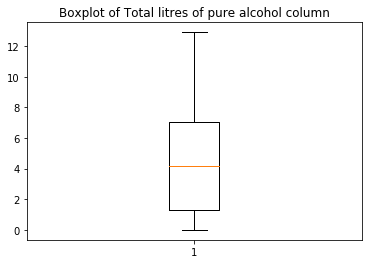

In [67]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of Total litres of pure alcohol column')
plt.show()

In [ ]:
# No outliers

In [68]:
Q1 = np.percentile(data['total_litres_of_pure_alcohol'], 25, interpolation='midpoint')
Q2 = np.percentile(data['total_litres_of_pure_alcohol'], 50, interpolation='midpoint')
Q3 = np.percentile(data['total_litres_of_pure_alcohol'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
print(IQR)
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)
outlier = []
for x in data['total_litres_of_pure_alcohol']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
print(outlier)
print("Number of Outliers:",len(outlier))

1.25
4.2
7.05
5.8
-7.449999999999999
15.75
[]
Number of Outliers: 0
